<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 13**

## **Contenido**

- <a href="#con"> Conjuntos de entrenamiento y prueba</a><br>
- <a href="#met"> Métricas</a><br>
- <a href="#pre"> Preprocesado: Selección de características</a><br>

<p><a name="con"></a></p>

# **Conjuntos de entrenamiento y prueba**

* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. Puede llamarse conjunto de datos de validación.




![picture](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/12/Table-of-Data-Showing-an-Instance-Feature-and-Train-Test-Datasets.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tomasate/Diplomado_ML/main/datasets/data/nivel_1/Data/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
X = df[['FUELCONSUMPTION_CITY']]
y = df[["CO2EMISSIONS"]]

print(X.shape, y.shape)
X.head()

(1067, 1) (1067, 1)


,FUELCONSUMPTION_CITY
0,9.9
1,11.2
2,6.0
3,12.7
4,12.1


Para dividir los datos en ambos conjuntos podemos usar el metodo `train_test_split` del submódulo `sklearn.model_selection`

In [ ]:
# SI queremos escoger una muestra aleatoria que no cambie por corrida usamos una semilla

np.random.seed(42)
sample = np.random.normal(size=5)
print(sample)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]


In [ ]:
from sklearn.model_selection import train_test_split

train_test_split?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
333,0.336472,2.140066,1.931521,2.054124,3.583519
106,1.481605,2.708050,2.282382,2.541602,3.091042
585,1.098612,2.415914,2.128232,2.292535,3.367296
55,1.098612,2.580217,2.219203,2.433613,3.218876
213,1.667707,2.906901,2.653242,2.803360,2.833213


In [ ]:
X_train.shape, y_train.shape

((853, 1), (853, 1))

Entrenemos el modelo con el conjunto de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_ , model.coef_

(array([72.30034697]), array([[13.85179628]]))

<p><a name="met"></a></p>

# **Métricas**

Una vez nuestro modelo esta entrenado, necesitamos ver si este realiza buenas o malas predicciones. Para esto haremos uso de las llamadas [*métricas*](https://scikit-learn.org/stable/modules/model_evaluation.html) que nos permitirán cuantificar el rendimiento de nuestro modelo actuando sobre datos que nunca ha "visto".

* **Coeficiente de determinación**

\begin{equation}
R^2 = 1 - \frac{\sum_i  (y_i - \hat y_i)^2}{\sum_i  (y_i - \overline y)^2}
\end{equation}


Notemos que si $ y_0 = \hat{y}_0,  \,\,\, y_1 = \hat{y}_1\,\,\, ...\,\,\, y_n = \hat{y}_n$ entonces el numerador será  $0$




In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
len(y_pred)

214

In [ ]:
r2_score(y_test, y_pred)

0.8184231533160797

El estimador `LinearRegression` incorpora el método `score` que nos permite evaluar el modelo sin pasar por el proceso de predicción. Tenemos que pasar los datos de prueba directamente:

In [ ]:
model.score(X_test, y_test)

0.8184231533160797

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Ejercicio 1:** Entre un modelo de regresión lineal utilizando todas las variables numéricas y obtenga el coeficiente de determinación $R^2$ 

***Ayuda:*** *Utilice el método* `select_dtypes` *de los DataFrames de Pandas*

In [ ]:
X = df.select_dtypes(exclude='object').drop(columns = ['CO2EMISSIONS', 'MODELYEAR'])
y = df[['CO2EMISSIONS']]

In [ ]:
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

0.9034041224574011

Ahora que hemos visto cómo se da la evaluación de los modelos de ML, mediante los conceptos de conjuntos de entrenamiento y prueba, tenemos una visión más general de cómo es el proceso para la implementación de un sistema de ML.

<p><a name="pre"></a></p>

# **Preprocesado: Selección de características**

Las características y los modelos se ubican entre los datos sin procesar y la información deseada. En un flujo de trabajo de ML, elegimos no solo el modelo, sino también las características: la elección de una afecta a la otra. 




<p><img alt="Colaboratory logo" height="340px" src="https://i.imgur.com/Q5C8NGb.png" align="left" hspace="10px" vspace="0px"></p>

Unas buenas características facilitan el proceso subsequente de modelado y hacen que el modelo resultante sea más capaz de completar la tarea deseada. Malas características pueden requerir un modelo mucho más complicado para lograr el mismo nivel de rendimiento.

**Correlación**

La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: Pearson, Spearman y Kendall. Cada uno tiene sus propias suposiciones sobre los datos que deben cumplirse para que la prueba pueda medir con precisión el nivel de correlación. Veamos cómo están distribuidas nuestras variables:

* Para la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* La correlación de Kendall es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación.

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una relación monotónica entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

De nuevo, seleccionemos únicamente las variables numéricas y evaluemos qué tan correlacionadas están las variables

In [ ]:
num_df = df.select_dtypes(exclude='object').drop(columns = ['MODELYEAR', 'CYLINDERS'])

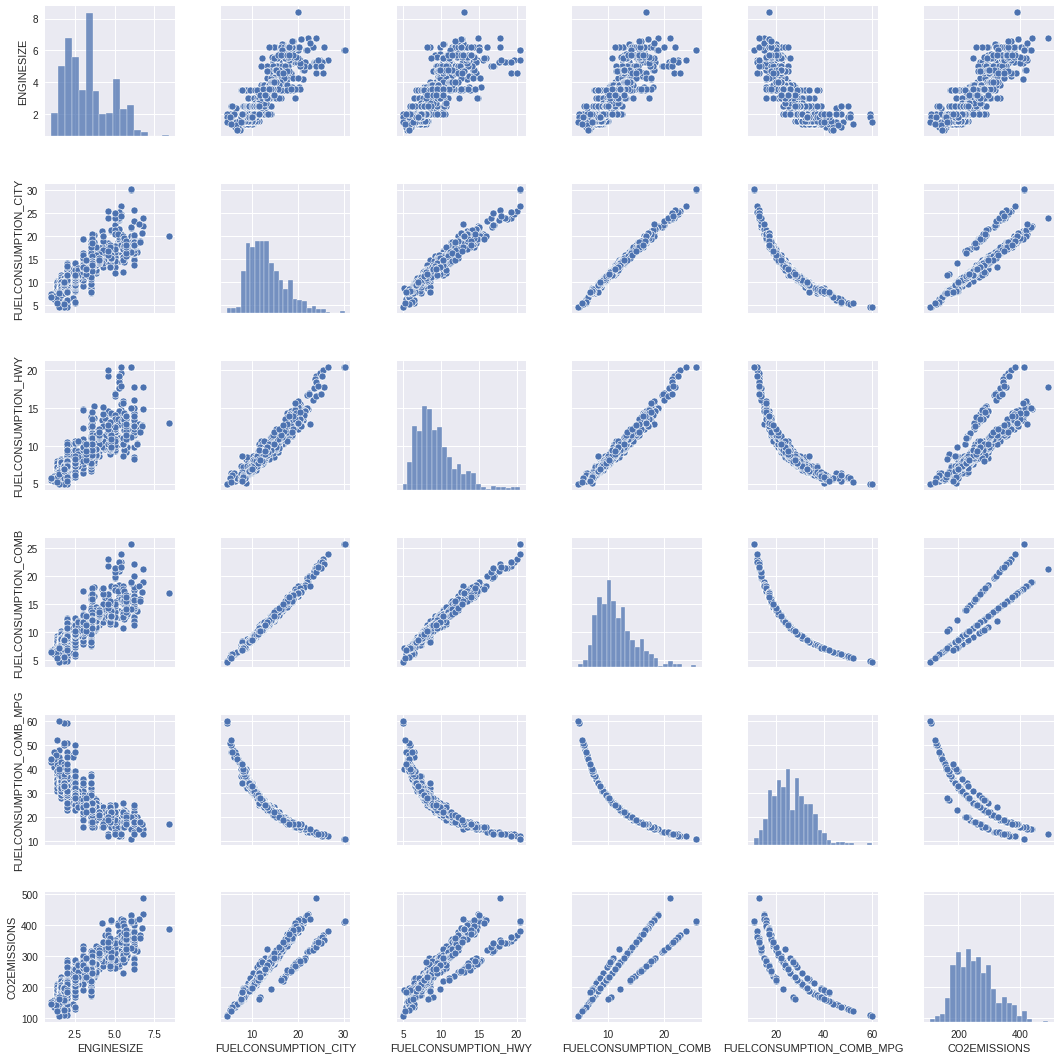

In [ ]:
sns.pairplot(data = num_df);

Podemos cuantificar la correlación utilizando el método `corr` de Pandas

In [ ]:
cor = num_df.corr()
cor

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.832225,0.778746,0.819482,-0.808554,0.874154
FUELCONSUMPTION_CITY,0.832225,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.898039,0.861748,0.892129,-0.906394,1.000000


Para el caso de la correlación de Pearson podemos transformar nuestros datos de manera que estos tengan una distribución más normal. 

Sklearn nos proporciona el transformador `FunctionTransformer`, a partir del cual podemos implementar un transformador a partir de una función arbitraria

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
log_transform = FunctionTransformer(func = np.log)
num_df = log_transform.transform(num_df)

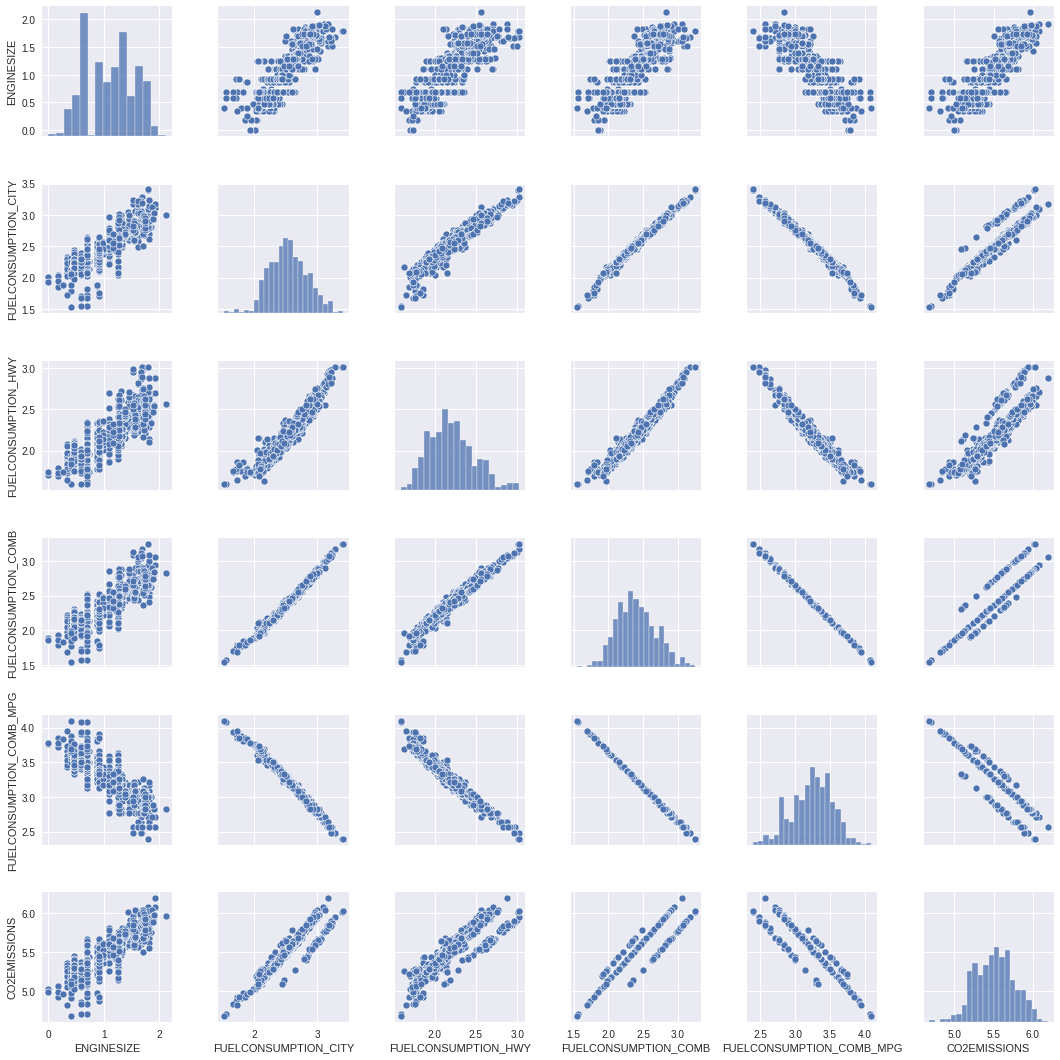

In [ ]:
sns.pairplot(data = num_df);

Alternativamente, podemos transformar nuestros datos a través de una función universal

In [ ]:
#num_df = np.log(num_df)

Una vez los datos están convertidos, veamos la correlación entre las variables:

In [ ]:
cor = num_df.corr()
cor

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.844647,0.812259,0.842699,-0.841870,0.867936
FUELCONSUMPTION_CITY,0.844647,1.000000,0.957360,0.994401,-0.993570,0.934548
FUELCONSUMPTION_HWY,0.812259,0.957360,1.000000,0.982331,-0.981436,0.899545
FUELCONSUMPTION_COMB,0.842699,0.994401,0.982331,1.000000,-0.999147,0.931209
FUELCONSUMPTION_COMB_MPG,-0.841870,-0.993570,-0.981436,-0.999147,1.000000,-0.929868
CO2EMISSIONS,0.867936,0.934548,0.899545,0.931209,-0.929868,1.000000


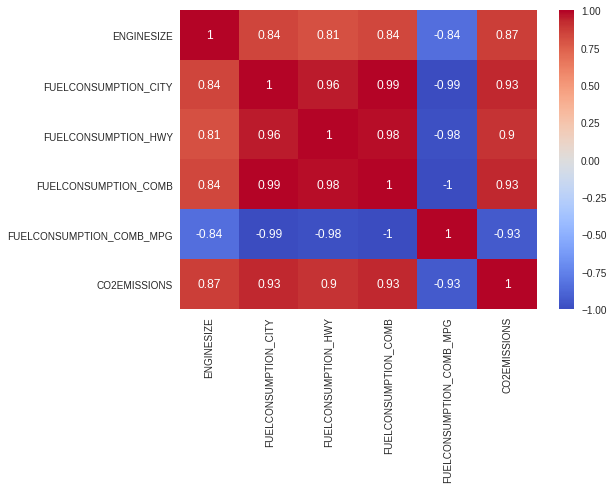

In [ ]:
sns.heatmap(data = cor, vmin= -1, vmax = 1, cmap = 'coolwarm', annot=True);

Cuando tenemos varias características que están altamente correlacionadas, aparece el problema de la multicolinealidad, el cual hace que el modelo se vuelva inestable, por lo que pequeñas variaciones en los datos puede causar grandes cambios en el modelo, por lo que la interpretación del modelo se hace muy dificil.

**Ejercicio 2:** Construya una función `LR` que tenga como entrada la matriz de características $X$, la variable objetivo $y$ y la semilla para el kwarg `random_state` del método `train_test_split`. Esta debe separar los datos en los conjuntos de entrenamiento y prueba, entrenar un modelo de regresión lineal y mostrar como salida el coeficiente de determinación $R^2$ y los parámetros del modelo.

In [ ]:
def LR(X, y, seed = 42):

  """
  Recibe como entrada X que tenga la forma (de número de instancias, número de características), 
  y que tenga como entradas (número de instancias, 1)
  & una semilla que por defecto ha sido determinada al valor 42
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= seed)

  LR = LinearRegression().fit(X_train, y_train)
  
  #y_pred = model.predict(X_test)

  #r2 = r2_score(y_test, y_pred)
  #print(f'R2 : {r2}')
  print(LR.score(X_test, y_test))
  print(f'Intercepto : {LR.intercept_}')
  print(f'Coeficientes : {LR.coef_}')


Con la función creada, entrenemos un modelo utilizando todas las características:

In [ ]:
num_df

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.693147,2.292535,1.902108,2.140066,3.496508,5.278115
1,0.875469,2.415914,2.041220,2.261763,3.367296,5.398163
2,0.405465,1.791759,1.757858,1.774952,3.871201,4.912655
3,1.252763,2.541602,2.208274,2.406945,3.218876,5.541264
4,1.252763,2.493205,2.163323,2.360854,3.295837,5.497168
...,...,...,...,...,...,...
1062,1.098612,2.595255,2.282382,2.468100,3.178054,5.602119
1063,1.163151,2.580217,2.251292,2.442347,3.218876,5.575949
1064,1.098612,2.595255,2.282382,2.468100,3.178054,5.602119
1065,1.163151,2.557227,2.230014,2.424803,3.218876,5.560682


In [ ]:
X = num_df.drop(columns='CO2EMISSIONS')
y = num_df[['CO2EMISSIONS']]

In [ ]:
LR(X,y)

0.9050065672719569
Intercepto : [1.91346012]
Coeficientes : [[ 0.16195542  1.40369087  0.58819994 -1.06978901  0.34921396]]


In [ ]:
LR(X,y, 200)

0.902970676718047
Intercepto : [2.86192201]
Coeficientes : [[ 0.1685831   1.53051809  0.69112749 -1.47274833  0.18320469]]


Seleccionemos ahora las características que están menos correlacionadas

In [ ]:
X = df[['ENGINESIZE', 'FUELCONSUMPTION_HWY']]
y = df[['CO2EMISSIONS']]

In [ ]:
LR(X,y)

0.8527031036959104
Intercepto : [81.4694743]
Coeficientes : [[23.16780322 10.30122921]]


In [ ]:
LR(X,y, 200)

0.8426545345890182
Intercepto : [81.41242011]
Coeficientes : [[23.5819947 10.1316066]]


Note que en este caso la estabilidad de los parámetros (hay poca variación utilizando diferentes datos para el entrenamiento i.e. diferentes semillas)